# Classifiers Train Time Exploration

## to-read

- [Predicting how long an scikit-learn classification will take to run
](https://stackoverflow.com/questions/22443041/predicting-how-long-an-scikit-learn-classification-will-take-to-run)
- [What is better, k-nearest neighbors algorithm (k-NN) or Support Vector Machine (SVM) classifier? Which algorithm is mostly used practically? Which algorithm guarantees reliable detection in unpredictable situations?
](https://www.quora.com/What-is-better-k-nearest-neighbors-algorithm-k-NN-or-Support-Vector-Machine-SVM-classifier-Which-algorithm-is-mostly-used-practically-Which-algorithm-guarantees-reliable-detection-in-unpredictable-situations)
- [Logit, Smote, RFE, ROC](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8)

- [Dimensionality Curse](https://stats.stackexchange.com/questions/186184/does-dimensionality-curse-effect-some-models-more-than-others)

In [2]:
import pandas as pd

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

import numpy as np

from math import ceil, floor

from collections import namedtuple

import pickle

In [3]:
COLUMNS = ["N", "method", "cpu_time", "wall_time", "data_shape", "parameters"]
DATA = [
    [None, "decision_tree",         "14.7 ms", "12.6 ms", (20, 5), {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}],
    [None, "naive_bayes",           "17.3 ms", "15.7 ms", (20, 5), {'priors': None, 'var_smoothing': 1e-09}],
    [None, "logistic_regression",   "30.8 ms", "26.1 ms", (20, 5), {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}],
    [None, "RBF_SVM",               "17.7 ms", "15.7 ms", (20, 5), {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 2, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False} ],
    [None, "multilayer_perceptron", "135 ms",  "131 ms",  (20, 5), {'activation': 'relu', 'alpha': 1, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}],
    [None, "k_nearest_neighbors",   "18.8 ms", "17.3 ms", (20, 5), {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}],

    [None, "decision_tree",         "6.67 ms", "6.24 ms", (131, 8), {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}],
    [None, "naive_bayes",           "8.78 ms", "8.22 ms", (131, 8), {'priors': None, 'var_smoothing': 1e-09}],
    [None, "logistic_regression",   "22.5 ms", "20.3 ms", (131, 8), {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}],
    [None, "RBF_SVM",               "7.69 ms", "7.2 ms",  (131, 8), {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 2, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}],
    [None, "multilayer_perceptron", "189 ms",  "188 ms",  (131, 8), {'activation': 'relu', 'alpha': 1, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (5,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}],
    [None, "k_nearest_neighbors",   "7.42 ms", "6.1 ms",  (131, 8), {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}],

    [None, "decision_tree",         "10.5 ms", "9.77 ms", (905, 11), {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}],
    [None, "naive_bayes",           "9.89 ms", "8.76 ms", (905, 11), {'priors': None, 'var_smoothing': 1e-09}],
    [None, "logistic_regression",   "451 ms",  "83.1 ms", (905, 11), {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}],
    [None, "RBF_SVM",               "464 ms",  "65.7 ms", (905, 11), {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 2, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}],
    [None, "multilayer_perceptron", "855 ms",  "447 ms",  (905, 11), {'activation': 'relu', 'alpha': 1, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (25,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}],
    [None, "k_nearest_neighbors",   "19.3 ms", "17.9 ms", (905, 11), {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}],

    [None, "decision_tree",         "34.3 ms", "33.7 ms", (5630, 18), {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}],
    [None, "naive_bayes",           "10.4 ms", "9.01 ms", (5630, 18), {'priors': None, 'var_smoothing': 1e-09}],
    [None, "logistic_regression",   "2.1 s",   "294 ms",  (5630, 18), {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}],
    [None, "RBF_SVM",               "3.38 s",  "2.5 s",   (5630, 18), {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 2, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}],
    [None, "multilayer_perceptron", "16.8 s",  "2.26 s",  (5630, 18), {'activation': 'relu', 'alpha': 1, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}],
    [None, "k_nearest_neighbors",   "1.11 s",  "236 ms",  (5630, 18), {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}],

    [None, "decision_tree",         "240 ms",   "239 ms",   (17472, 57), {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}],
    [None, "naive_bayes",           "27.3 ms",  "26.1 ms",  (17472, 57), {'priors': None, 'var_smoothing': 1e-09}],
    [None, "logistic_regression",   "28.6 s",   "3.99 s",   (17472, 57), {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}],
    [None, "RBF_SVM",               "2min 17s", "2min 16s", (17472, 57), {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 2, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}],
    [None, "multilayer_perceptron", "3min 31s", "27.6 s",   (17472, 57), {'activation': 'relu', 'alpha': 1, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}],
    [None, "k_nearest_neighbors",   "7.18 s",   "6.66 s",   (17472, 57), {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}],

    [None, "decision_tree",         "2.84 s",    "2.88 s",    (34710, 227), {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}],
    [None, "naive_bayes",           "420 ms",    "426 ms",    (34710, 227), {'priors': None, 'var_smoothing': 1e-09}],
    [None, "logistic_regression",   "3min 52s",  "39.4 s",    (34710, 227), {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}],
    [None, "RBF_SVM",               "30min 39s", "31min 28s", (34710, 227), {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 2, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}],
    [None, "multilayer_perceptron", "7min 16s",  "57.4 s",    (34710, 227), {'activation': 'relu', 'alpha': 1, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}],
    [None, "k_nearest_neighbors",   "1min 59s",  "1min 58s",  (34710, 227), {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}],

    [None, "decision_tree",         "2.32 s",       "2.32 s",       (44053, 227), {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}],
    [None, "naive_bayes",           "923 ms",       "924 ms",       (44053, 227), {'priors': None, 'var_smoothing': 1e-09}],
    [None, "logistic_regression",   "3min",         "24.6 s",       (44053, 227), {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}],
    [None, "RBF_SVM",               "1h 13min 38s", "1h 13min 41s", (44053, 227), {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 2, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}],
    [None, "multilayer_perceptron", "16min 52s",    "2min 34s",     (44053, 227), {'activation': 'relu', 'alpha': 1, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}],
    [None, "k_nearest_neighbors",   "3min 53s",     "3min 52s",     (44053, 227), {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}],

    [None, "decision_tree",         "56.5 s", "56.6 s",             (476169, 227), {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}],
    [None, "naive_bayes",           "32 s", "34.9 s",               (476169, 227), {'priors': None, 'var_smoothing': 1e-09}],
    [None, "logistic_regression",   "36min 29s", "4min 53s",        (476169, 227), {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}],
    [None, "multilayer_perceptron", "31min 58s", "4min 11s",        (476169, 227), {'activation': 'relu', 'alpha': 1, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}],
    [None, "k_nearest_neighbors",   "3h 32min 11s", "11h 27min 6s", (476169, 227), {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}],
]

In [4]:
original_df = pd.DataFrame(DATA, columns=COLUMNS)
main_df = original_df.copy()

In [5]:
df = main_df

df.N = df.data_shape.apply(lambda x: x[0] * x[1])
display(df.sample(5))

main_df = df

,N,method,cpu_time,wall_time,data_shape,parameters
2,100,logistic_regression,30.8 ms,26.1 ms,"(20, 5)","{'C': 1.0, 'class_weight': None, 'dual': False..."
30,7879170,decision_tree,2.84 s,2.88 s,"(34710, 227)","{'ccp_alpha': 0.0, 'class_weight': None, 'crit..."
28,995904,multilayer_perceptron,3min 31s,27.6 s,"(17472, 57)","{'activation': 'relu', 'alpha': 1, 'batch_size..."
0,100,decision_tree,14.7 ms,12.6 ms,"(20, 5)","{'ccp_alpha': 0.0, 'class_weight': None, 'crit..."
39,10000031,RBF_SVM,1h 13min 38s,1h 13min 41s,"(44053, 227)","{'C': 1, 'break_ties': False, 'cache_size': 20..."


In [6]:
df = main_df

df.cpu_time = df.cpu_time.apply(lambda x: pd.to_timedelta(x).total_seconds())

df.wall_time = df.wall_time.apply(lambda x: pd.to_timedelta(x).total_seconds())
display(df.sample(5))

main_df = df

,N,method,cpu_time,wall_time,data_shape,parameters
11,1048,k_nearest_neighbors,0.00742,0.00610,"(131, 8)","{'algorithm': 'auto', 'leaf_size': 30, 'metric..."
12,9955,decision_tree,0.01050,0.00977,"(905, 11)","{'ccp_alpha': 0.0, 'class_weight': None, 'crit..."
25,995904,naive_bayes,0.02730,0.02610,"(17472, 57)","{'priors': None, 'var_smoothing': 1e-09}"
31,7879170,naive_bayes,0.42000,0.42600,"(34710, 227)","{'priors': None, 'var_smoothing': 1e-09}"
43,108090363,naive_bayes,32.00000,34.90000,"(476169, 227)","{'priors': None, 'var_smoothing': 1e-09}"


In [7]:
from matplotlib.ticker import FuncFormatter

def format_func(x, pos):
    hours = int(x//3600)
    minutes = int((x%3600)//60)
    seconds = int(x%60)

#     return "{:d}:{:02d}".format(hours, minutes)
    return "{:d}:{:02d}:{:02}".format(hours, minutes, seconds)

formatter = FuncFormatter(format_func)

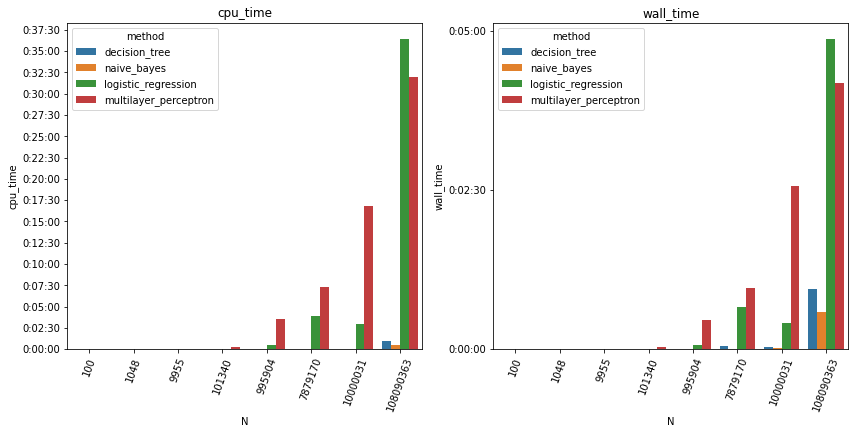

In [8]:
classifiers = [
    "decision_tree",
    "naive_bayes",
    "logistic_regression",
#     "RBF_SVM",
    "multilayer_perceptron",
#     "k_nearest_neighbors",
]

df = main_df[main_df["method"].isin(classifiers)]

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(14, 6)

_ = sns.barplot(x="N", y="cpu_time", hue="method", data=df, ax=axes[0]).set_title("cpu_time")
_ = sns.barplot(x="N", y="wall_time", hue="method", data=df, ax=axes[1]).set_title("wall_time")

# Rotate x ticks
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=70)

for ax in axes:
    ax.yaxis.set_major_formatter(formatter)
    # this locates y-ticks at the hours
    ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=150))
#     # this ensures each bar has a 'date' label
#     ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1))

## Classifiers Properties and Problems

### K-Means

- [K-Means as binary classifier should be avoided](https://www.ibm.com/support/pages/clustering-binary-data-k-means-should-be-avoided)

### Why is K-Nearest Neighbors so slow


### SVM

#### Why is SVM so slow

- [O(n^2 * featurs) - O(n^3 * features)](https://stackoverflow.com/questions/40077432/why-is-scikit-learn-svm-svc-extremely-slow)





## Number of Rows and Features

### What is the minimum number of data for given NN

- [2-3 times number of weights](https://www.researchgate.net/post/Is_there_any_reference_methods_rules_to_understand_about_the_minimum_number_of_observations_needed_for_ANN_based_data_prediction)

### SVM

- [SVM Classification - minimum number of input sets for each class](https://stackoverflow.com/questions/2284059/svm-classification-minimum-number-of-input-sets-for-each-class)

Number of datapoints $N$, for number of features $F$ and number of rows $R$

$N = F * R$

MLP: 1 layer

$(F + 1) * neurons = R$

In [1]:
def minSamplesForMLP(featuers, neurons, multiple)
    required_rows = ((features+1)*neurons*multiple)
    print(f"Number of required rows: {required_rows}\n")

def roundFeaturesAndRows(*, N, f, r):
    f_up, r_down, f_down, r_up = ceil(f), floor(r), floor(f), ceil(r)

    print("N: {: <18}| F:       {: <18}| R:       {}\n".format(f*r, f, r))

    if abs(N-(f_up*r_down)) < abs(N-(f_down*r_up)):
        print("N: {: <18}| F(up):   {: <18}| R(down): {}".format(f_up*r_down, f_up, r_down))
        N, F, R = N, f_up, r_down
    else: 
        print("N: {: <18}| F(down): {: <18}| R(down): {}".format(f_down*r_up, f_down, r_up))
        N, F, R = N, f_down, r_up

    return (N, F, R)


def getSizeFeaturesRows(*, N, F=None, R=None, neurons=100, multiple=3):
    if (F is not None) and (R is not None):
        print("N: {: <18}| F:       {: <18}| R:       {}\n".format(F*R, F, R))
        return (F*R, F, R)
    if F is not None:
        return roundFeaturesAndRows(N=N, f=F, r=N/F)
    if R is not None:
        return roundFeaturesAndRows(N=N, f=N/R, r=R)
    
    a, b, c = 1, 1, -N/(neurons*multiple)

    f = (-b + np.sqrt(b**2 - 4*a*c)) / 2*a
    r = (f + 1)*neurons*multiple

    return roundFeaturesAndRows(N=N, f=f, r=r)
        


SyntaxError: invalid syntax (<ipython-input-1-7b9a721735a6>, line 1)

In [10]:
idx = 6
N        = [100, 1000, 10000, 100_000, 1_000_000, 10_000_000, 100_000_000][idx]
neurons  = [3, 5, 25, 100, 100, 100, 100][idx]
multiple = [1, 3, 3, 3, 3, 3, 3][idx]
F = 227  # None
R = 458893*2 # None # 34710 

getSizeFeaturesRows(N=N, F=F, R=R, neurons=neurons, multiple=multiple)

N: 208337422         | F:       227               | R:       917786



(208337422, 227, 917786)

In [ ]:
# Training

IDX = 6

TRAIN_SAMPLE_SIZE = [20, 130, 905, 5629, 17472, 34710, 44053][IDX]
FEATURES_NUMBER   = [5, 8, 11, 18, 57, 227, 227][IDX]
HIDDEN_NEURONS    = [3, 5, 25, 100, 100, 100, 100][IDX]

In [9]:
Model = namedtuple("Model", ["name", "classifier", "train_set", "test_set", "y_prediction"])
Dataset = namedtuple("Dataset", ["X", "y"])

# models_path = "../../../../../gitlab/ni-pdd-2020-langeja5/02/models"
# models = pickle.load(open(f"{models_path}/models_20_5.pkl", "rb" ))